# Using Linear and Non-linear Machine Learning Techniques to classify Music into specific Genres

# Abstract

Music genre classification is an important ML task that allows one to further analyze musical data in more correlated subgroups. The problem is also hard as labeling songs into genres is not so black and white, many experts disagree on what songs constitute as rock and blues music. The task is one of machine learning classification and can be attempted in many ways. In this paper we utilize both linear methods such as Logistic Regression and Gradient Boosting as well as non-linear models such as Neural Networks to handle this problem at hand. The paper discusses the progress in the Kaggle competition that provided the labeled training data and non-labeled test data. The methods used to analyze the data and features and the implementation of the various machine learning models are explained.<br>
The results of the implementation are that in general linear models outperform the non-linear models due to factors such as the size of the data available for training and the underlying imbalance in the dataset. The best model that was trained used the gradient boosting library XGBoost which achieved a maximum accuracy of 65% both in local and Kaggle tests. The logistic regression models obtained the best log loss value of 0.19 on Kaggle. 

**Keywords: Genre, Music, Classification, Logistic Regression, XGBoost, Neural Networks, Imbalanced dataset** 

# Introduction

###### The Problem:
In today's world, There is an urgency to have good music genre classifcations due to two main reasons:<br>
1. Majority of people listen to genre-specific music, there-fore there is always the on-going catalogueing problem, where in we need to catalogue new music, and there is new music each day. Thus, users would like their music to be easily organized and catalogued.[2]<br>
2. Companies and Record Labels will now like to take advantage of the Information Data era, and place better and better reccomendations for their User-base.[2]<br>
There-fore there is a pressing need for good music genre classification methods and this project is a stepping stone towards that goal.[1]<br>


##### The Approach:
To build a predictor using the below Linear and Non-Linear Methods:<br>
1. Logistic Regression <br>
2. Neural Network <br>
We now mix the above two sauces with the raw materials to create the perfect meal!<br>

THE RAW MATERIALS:<br>
The training data set with 4363 songs, and a test set dataset with 6544 songs. Each song has 264 features, and there are 10 possible classes in total.<br>
The features provided are a summary representation of the 3 main components of music: timbre, pitch (melody and harmony) and rhythm.<br>
Timbre: "The tonal colour, or timbre, is a multidimensional psychoacoustic measure.the MFCCs provide a spectrum of the spectrum of an audio file, showing the overall shape of the frequency content and can be used to describe timbre. [from Communication Acoustics]<br>
Rhythm: "Rhythm is a complex concept which refers to different temporal structures in music. [from Communication Acoustics]<br>
Pitch: "Pitch is defined by the American National Standards Institute as 'that auditory attribute of sound according to which sounds can be ordered on a scale from low to high'." [from Communication Acoustics]<br>

THE SAUCE:<br>
We use two methodologies in order to encompass and harness the advantages they both uniquely offer:
1. Linear Methodology(Logistic Regression)
2. Non-Linear Methodology(Neural Networks)

Logistic Regression is the basic method to try when attempting any classification task, with proper tuning of regularization parameters we can achieve pretty good results if the underlying data model s not too complex.<br>
We also test Neural Networks because we can use different activation functions to introduce non-linearity in our models and that allows us to fit much more complex models.

Each approach has it's own benefits and drawbacks that will explored in the sections to come.

THE MEAL!!:<br>
To create a near-perfect methodology, we first pre-process and clean the data, and perform feature selection,
and then create models based on the above methodologies. The project is divided into the following sections:<br>
1. Data Analysis: Feature selection..etc<br>
2. Methods and Experiments: Liner and Non-Linear..etc<br>
3. Results<br>
4. Conclusions<br>
5. References<br>
6. Appendix

# Data Analysis:
### Overview: 
As in this project the data that we received was already processed data, we need to analyze the features to understand the distribution of the data and is there are any peculiarities in the data themselves. <br>
The first major thing that we must check is the distribution of the **10 different classes** in the training dataset. This gives us information of the **balance** of the database.
Next we need to check the correlation between the data and check for the relative outliers in the space and see if we reduce the dimensionality to better train more complex models 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']=130

## Histogram of class distribution 
Here we plot the histogram or the distribution of the labels of the data set given.<br>
We can clearly see the **imbalance that is starting to show in the database** 

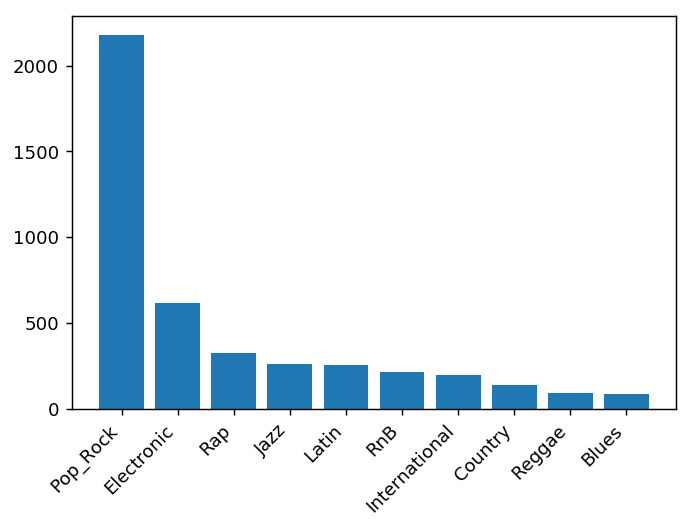

In [3]:
mpl.rcParams['figure.dpi']=130
# The name of the classes
classes = ['Pop_Rock','Electronic','Rap', 'Jazz','Latin','RnB','International','Country','Reggae','Blues']
#Reading the csv files
df_data = pd.read_csv("train_data.csv",header=None)
df_labels = pd.read_csv("train_labels.csv",header=None,names=["label"])
df_labels['label'].value_counts()

# Plotting histogram of the class distribution
plt.bar(range(1,11),df_labels.label.value_counts().values)
plt.xticks(range(1,11),classes,rotation=45,ha='right')
plt.show()


# Issues of Imbalance
There are several issues that will arise because of the imbalance in the database:
- The Accuracy for models will be high that only predict the most significant class<br>
    This is an issue as models that we train might achieve a high accuracy on the test set but that may be due to an improper/imbalanced classification that just favors the most probable class  
- We do not know if the actual underlying data is having a different distribution when compared to the training data.<br>
  this is problematic as we then may need to weight out classes to get a uniform representation for all the classes
- The model will never learn to properly predict BLues efficiently due to marginally small amount data points actually available
- We have to explore trying to fix either the imbalance or the model through over/under sampling such as SMOTE or ensemble classifier such as gradient boosting

## Creating the index for Rhythm, Chroma and MFCC features
Now we move on to analyzing the features of the audio sample that are given to us as data points.
They are of 3 major types:

1. Rhythm Patterns:
    - The complex temporal structures that exists in music 
    - The patterns that usually repeat in songs such as **hooks** in hip-hop songs or sections in blues and jazz
    - They explain the level of modulation that is occurring in frequency ranges
2. Chroma Values:
    - Representation of the musical spectrum in bins
    - These bins correspond to the **natural harmonies or 12 octaves** in Western Music or Svar in Hindustani Classical music
    - Can be used to analyze melody and range of songs
3. Mel Frequency Cepstral Coefficients:
    - The analysis of a spectrum of a spectrum gives us the MFCC coefficients 
    - These are useful in analyzing the format of the song 
    - Can help us identify the quantity of lyrics in a song
    - Very useful to **differentiate between** lyrical genres: **Rap** and more melodious ones: **Blues**
    - Also helpful to distinguish the timbre of the songs

In [4]:
# Rhythm is the first 168 features 24 bands with 7 statistics each
rhythm = list(range(24*7))
#Chroma is next 48 features 12 pitch classes with 4 statistics each
chroma = list(range(len(rhythm),len(rhythm)+12*4))
# MFCC are the last 48 featues 12 coefficinents with 4 statistics each
mfcc = list(range(len(chroma)+len(rhythm),len(chroma)+len(rhythm)+12*4))


## Feature Investigation space
We visualize the data for all the labels in a 3-D space and see their relative correlation and usefulness in the future while training models<br>
This analysis can give us insight into how we can identify the trends in patterns before we normalize them. So this gives us a representation of how the raw data is for all the different genres of music that is given to us

### Function to create a 3D plot

In [5]:
# import 3d plot tools
from mpl_toolkits.mplot3d import Axes3D

def plot3d(data,ax,y_axis_label,z_axis_label,title,legend=False):
    '''
    Function to plot a 3D representation of the data it recieves
    '''
    
    index = data.index
    columns = data.columns
    # Create a mesh grid to display the values
    XX,YY = np.meshgrid(index,columns)
    
    # Create an array for the color
    c = np.array([np.repeat(i,len(columns)) for i in index]).T
    
    # Plot the 3D scatter plot
    p=ax.scatter(XX,YY,data.values.T,c=c.flatten(),cmap='Spectral')
    
    # Condition to print the legend of the graph
    if legend == True:
        
        cmap = mpl.cm.get_cmap('Spectral')
        norm = mpl.colors.Normalize(vmin=1, vmax=10)
        
        #Create dummy artists to render the legend  properly
        dummy = [mpl.lines.Line2D([],[],color=cmap(norm(i)),linestyle='None',marker='.') for i in range(1,len(index)+1)]
        ax.legend(dummy,classes,fontsize='xx-small',title="Classes")
    
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks(columns)
    ax.tick_params(axis='y',labelsize='xx-small')
    ax.tick_params(axis='z',labelsize='xx-small')
    ax.set_yticklabels(range(1,len(columns)+1))
    ax.set_ylabel(y_axis_label)
    ax.set_zlabel(z_axis_label)
    # Set the viewing position of the 3D graph
    ax.view_init(elev=10,azim=10)



## Chroma Feature Analysis 
In the following cells we analyze the statistics of the chroma pitch classes of the data set. <br>
An effective way to do this is to find the average of each statistic for each genre and plot them for all the chroma pitch classes.
So once the averages across each label is calculated after a group-by of the dataframe they are individually plotted in 4 graphs later

In [6]:
def analyze_chroma():
    '''
    Function to analyze the average values of the 4 chroma statitics for all the 12 pitch classes
    '''
    mpl.rcParams['figure.dpi']=150
    
    # plot titles
    titles =[
            'Chroma Means\nDistribution',
            'Chroma Std Deviations\nDistribution',
            'Chroma Mins\nDistribution',
            'Chroma Max\nDistribution'
    ]
    
    # Create the plots
    fig = plt.figure(figsize=(9,9))
    chroma_mean=df_data[:][chroma]
    chroma_mean['label']=df_labels['label']
    avg = chroma_mean.groupby('label').mean()
    ax = fig.add_subplot(221, projection='3d')
    plot3d(data=avg[:][chroma[:12]],ax=ax,y_axis_label='Chroma Pitch Classes',z_axis_label='Means',title=titles[0],legend=True)
    ax = fig.add_subplot(222,projection='3d')
    plot3d(data=avg[:][chroma[12:24]],ax=ax,y_axis_label='Chroma Pitch Classes',z_axis_label='Std',title=titles[1])
    ax = fig.add_subplot(223,projection='3d')
    plot3d(data=avg[:][chroma[24:36]],ax=ax,y_axis_label='Chroma Pitch Classes',z_axis_label='Min',title=titles[2])
    ax = fig.add_subplot(224,projection='3d')
    plot3d(data=avg[:][chroma[36:48]],ax=ax,y_axis_label='Chroma Pitch Classes',z_axis_label='Max',title=titles[3])
    plt.show()


## Chroma Features Observation
Here across the 4 graphs we already see how different genres have a characteristic trend in a specific statistic. Some observations are 
- Blues and Reggae (_Purple and Blue color respectively_) in general have lower Chroma mean and min values when compared to genres such as Pop Rock or Electronic (_Maroon and Red colors respectively_) that tend to have higher harmonies
- The data is pretty well distributed without any extreme outliers or discrepancies 
- There are trends in Chroma standard deviation that can be used by machine learning models 
- The range of values are differing across statistics, hence feature scaling needs to be performed 

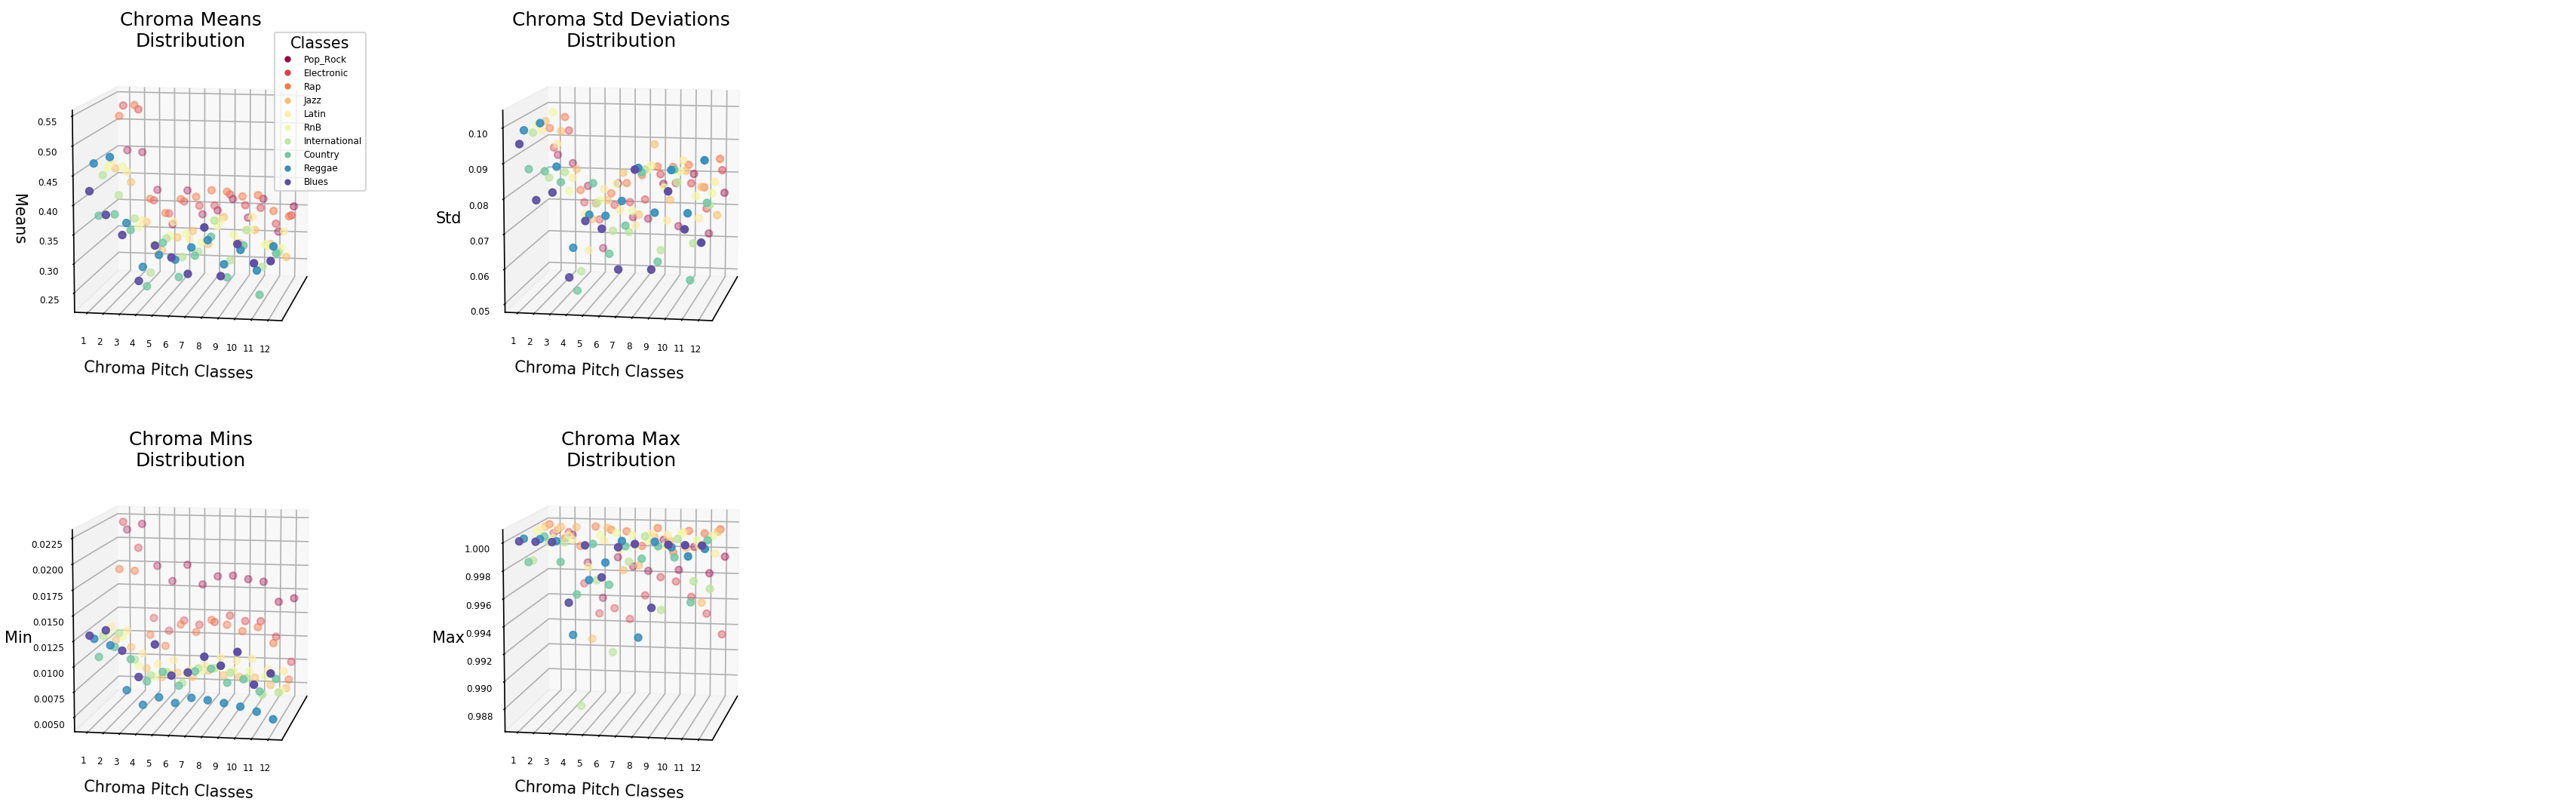

In [7]:
# Call function for chroma analysis
analyze_chroma()

## MFCC Coefficient Analysis
Similar to the Chroma pitch classes we will analyze the MFCC coefficients for all genres.<br>
The average of all the 4 statistics will be taken over all the data points that belong to the label and then the plots are generated

In [8]:
def analyze_mfcc():
    '''
    Function to analyze the MFCC coefficients for 4 statistics
    '''
    
    
    mfcc_mean=df_data[:][mfcc]
    mfcc_mean['label']=df_labels['label']
    avg = mfcc_mean.groupby('label').mean()
    fig = plt.figure(figsize=(9,9))
    titles =[
            'MFCC Means\nDistribution',
            'MFCC Std Deviations\nDistribution',
            'MFCC Mins\nDistribution',
            'MFCC Max\nDistribution'
    ]
    ax = fig.add_subplot(221, projection='3d')

    plot3d(data=avg[:][mfcc[:12]],ax=ax,y_axis_label='MFCC Coeffs',z_axis_label='Means',title=titles[0],legend=True)
    ax = fig.add_subplot(222,projection='3d')
    plot3d(data=avg[:][mfcc[12:24]],ax=ax,y_axis_label='MFCC Coeffs',z_axis_label='Std',title=titles[1])
    ax = fig.add_subplot(223,projection='3d')
    plot3d(data=avg[:][mfcc[24:36]],ax=ax,y_axis_label='MFCC Coeffs',z_axis_label='Min',title=titles[2])
    ax = fig.add_subplot(224,projection='3d')
    plot3d(data=avg[:][mfcc[36:48]],ax=ax,y_axis_label='MFCC Coeffs',z_axis_label='Max',title=titles[3])
    plt.show()

## MFCC Coefficients Observations
As we see the graph we notice a few **unusual trends** 
- In the first MFCC means distribution we spot that the first 4 coefficients have the same value of $10^6$ across all genres.
- This seems to be either a case of **corrupt or erroneous data** and the proof lies in the fact that the min and max values across the coefficients is not in the vicinity of $10^6$ 
- The first MFCC coefficient seems to have some corruption in all the statistics as all genres seem to have the same value
- Apart from these 4 problematic coefficients we can utilize the other coefficient statistics 


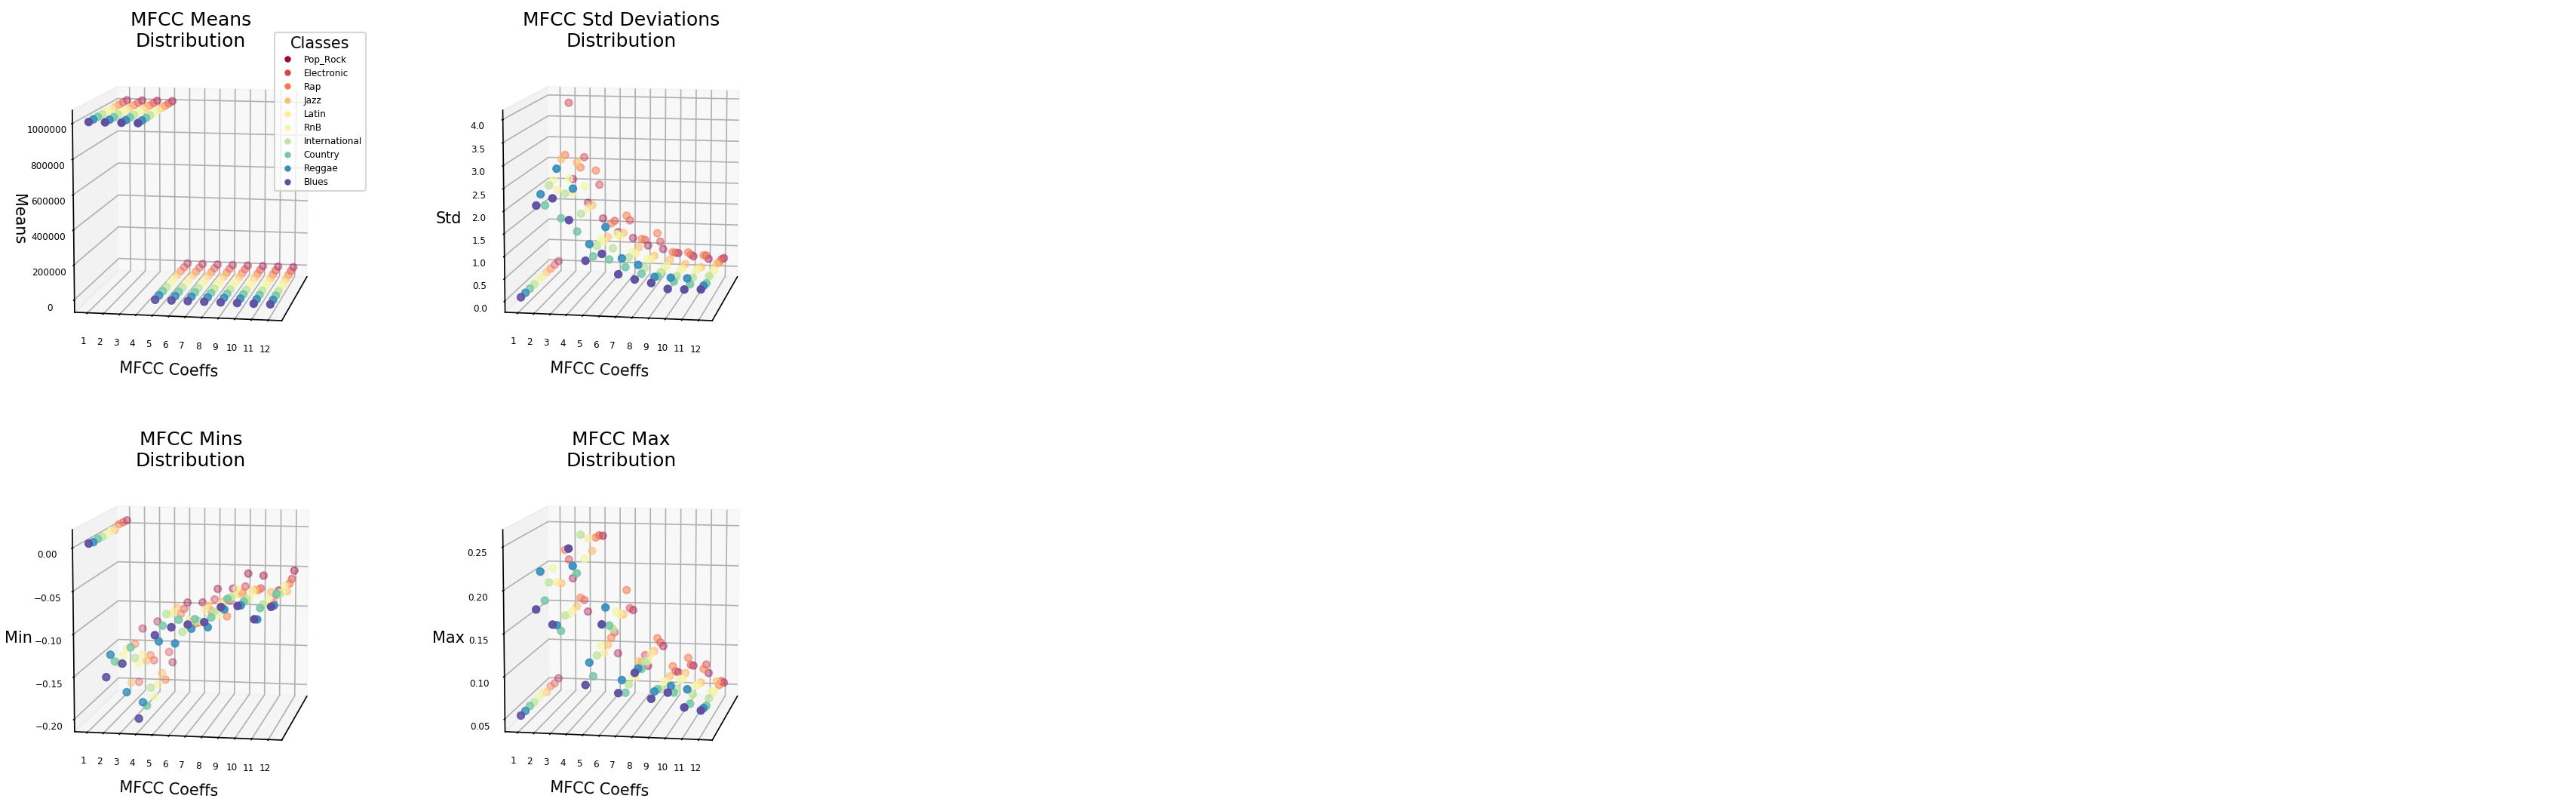

In [9]:
# Call Function to plot MFCC analysis
analyze_mfcc()

## Analysis of MFCC post cleaning
We perform outlier treatment by removing the first 4 MFCC coefficient and all their corresponding statistics.<br>
Hence this results in having only 8 MFCC coefficients in total and **reduces the MFCC features** from $48(12\cdot 4)$ to $32(8\cdot 4)$ 

In [10]:
def analyze_mfcc_clean():
    '''
    Function to analyse the MFCC features after removing the first 4 coeffeicnets that are corrupted for all statistics
    '''
    
    
    mfcc_mean=df_data[:][mfcc]
    mfcc_mean['label']=df_labels['label']
    avg = mfcc_mean.groupby('label').mean()
    fig = plt.figure(figsize=(9,9))
    titles =[
            'MFCC Means\nDistribution',
            'MFCC Std Deviations\nDistribution',
            'MFCC Mins\nDistribution',
            'MFCC Max\nDistribution'
    ]
    ax = fig.add_subplot(221, projection='3d')
    offset=4
    plot3d(data=avg[:][mfcc[offset:12]],ax=ax,y_axis_label='MFCC Coeffs',z_axis_label='Means',title=titles[0],legend=True)
    ax = fig.add_subplot(222,projection='3d')
    plot3d(data=avg[:][mfcc[12+offset:24]],ax=ax,y_axis_label='MFCC Coeffs',z_axis_label='Std',title=titles[1])
    ax = fig.add_subplot(223,projection='3d')
    plot3d(data=avg[:][mfcc[24+offset:36]],ax=ax,y_axis_label='MFCC Coeffs',z_axis_label='Min',title=titles[2])
    ax = fig.add_subplot(224,projection='3d')
    plot3d(data=avg[:][mfcc[36+offset:48]],ax=ax,y_axis_label='MFCC Coeffs',z_axis_label='Max',title=titles[3])
    plt.show()

## Clean MFCC Coefficients Observations 
- We now observe that the data is distributed in a fashion that can be expected of a machine learning problem
- Now more patterns emerge that can be highly useful for models to classify genre
- Blues (_Purple color_) tend to have a changing distribution across the means and on average much less deviation compared to RnB music (_Lime color_) 

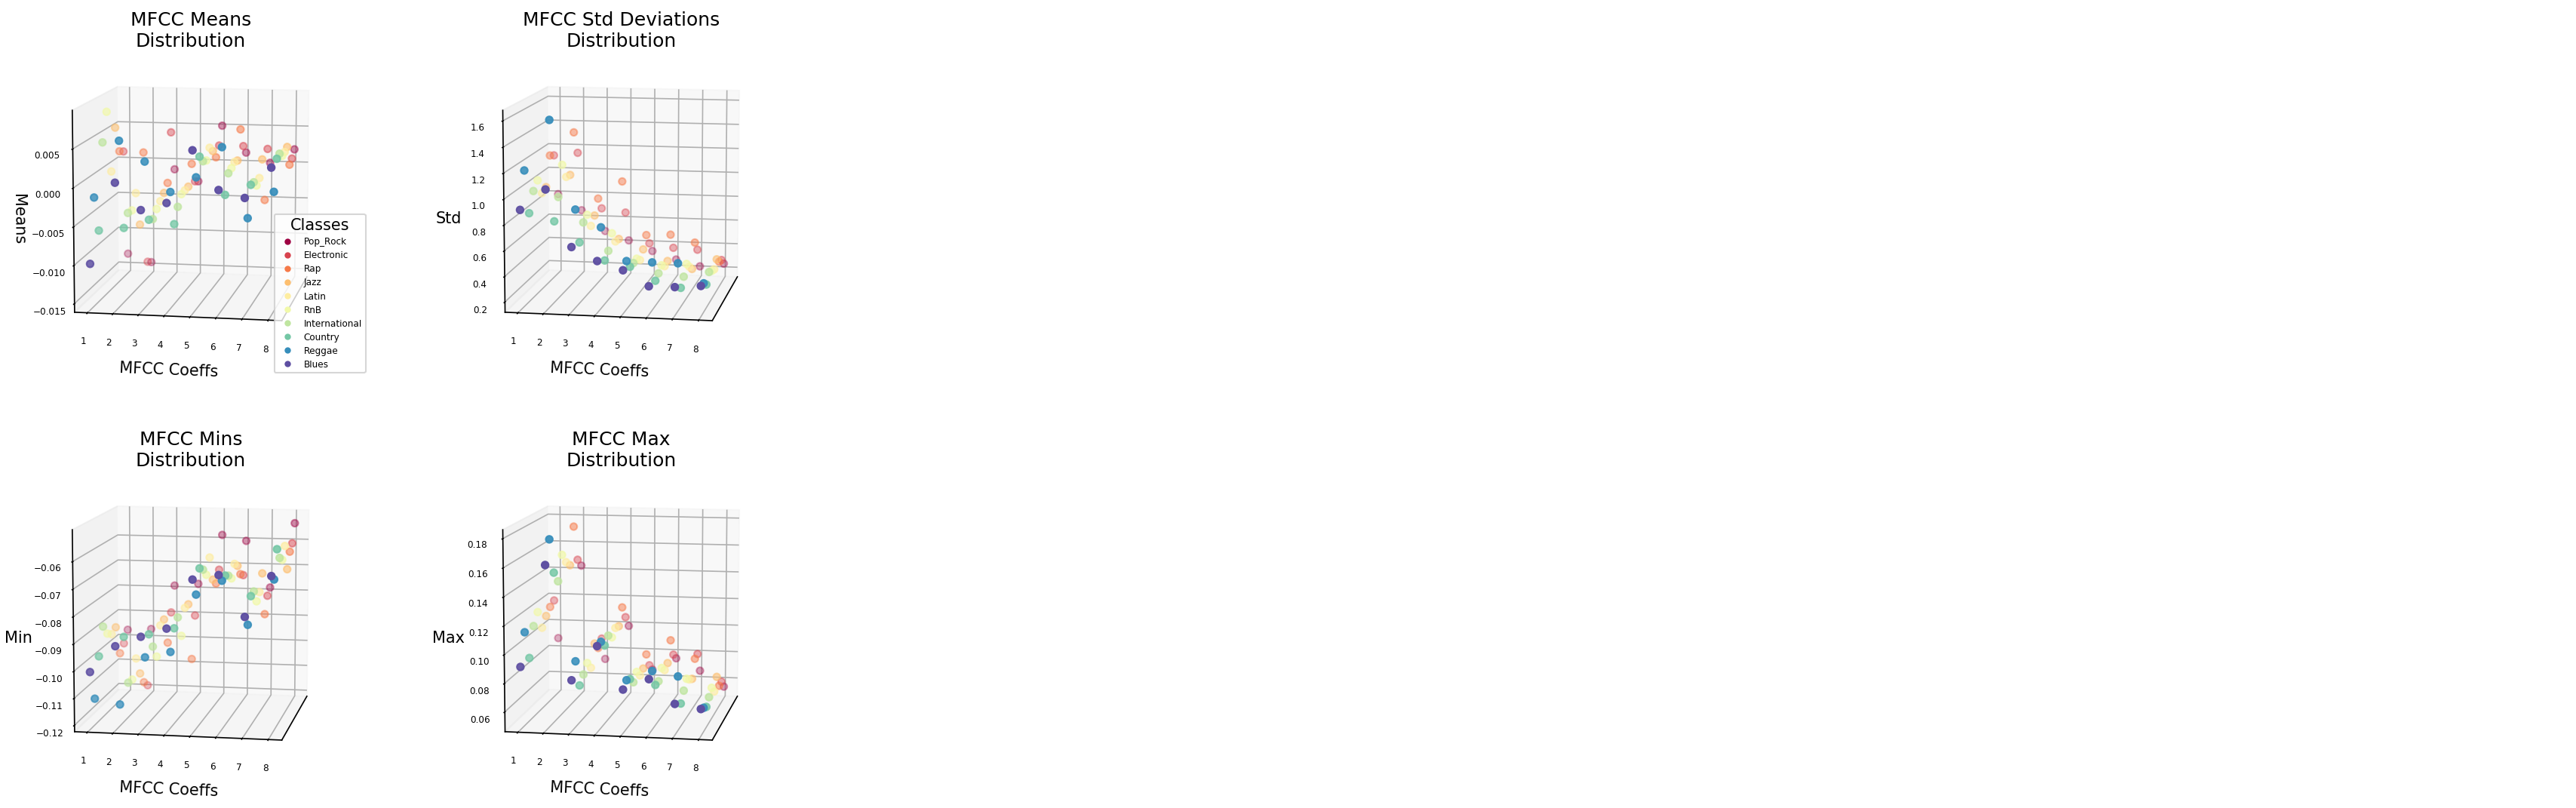

In [11]:
# Call function to analyze the MFCC coeffiencts
analyze_mfcc_clean()

## Rhythm Bands Analysis
Rhythms are complex in nature and do not lend themselves easily to visualization due to their dependence on time of the music.<br>
The previous method of averaging the rhythm statistics across multiple bands does work, but also tends to generalize the timbre and modulation.<br>
Hence to analyze the trends that rhythm can provide we only **focus on 2 statistics** where we can show the usefulness of the rhythm band details that is the distribution of the means and the minimums of the 24 rhythm bands

In [12]:
def analyze_rhythm():
    '''
    Function to analze the Rhythm band for the Means and Min statisitcs  
    '''
    
    rhythm_mean=df_data[:][rhythm]
    rhythm_mean['label']=df_labels['label']
    avg = rhythm_mean.groupby('label').mean()
    fig = plt.figure(figsize=(9,9))
    ax = fig.add_subplot(211,projection='3d')
    plot3d(data=avg[:][rhythm[:24]],ax=ax,y_axis_label='Rhythm Bands',z_axis_label='Means',title='Rythm Means\nDistribution',legend=True)
    ax = fig.add_subplot(212,projection='3d')
    plot3d(data=avg[:][rhythm[120:144]],ax=ax,y_axis_label='Rhythm Bands',z_axis_label='Mins',title='Rythm Mins\nDistribution',legend=True)


## Rhythm Bands Observation
We clearly see the representation of a rhythmic sequence in both these graphs. More importantly we can see that there are characteristic differences between the genres similar to our observations in the Chroma pitch classes
- Reggae (_Blue color_) music inherently has a lower mean and minimum throughout the rhythm bands
- Pop and Electronic (_Maroon and red colors respectively_) genres have a large peak around the 18th rhythm bands, much more than any other genre
- The rhythm structure of country and international music(_Green Colors_) is slightly different compared to other genres in first few rhythm bands

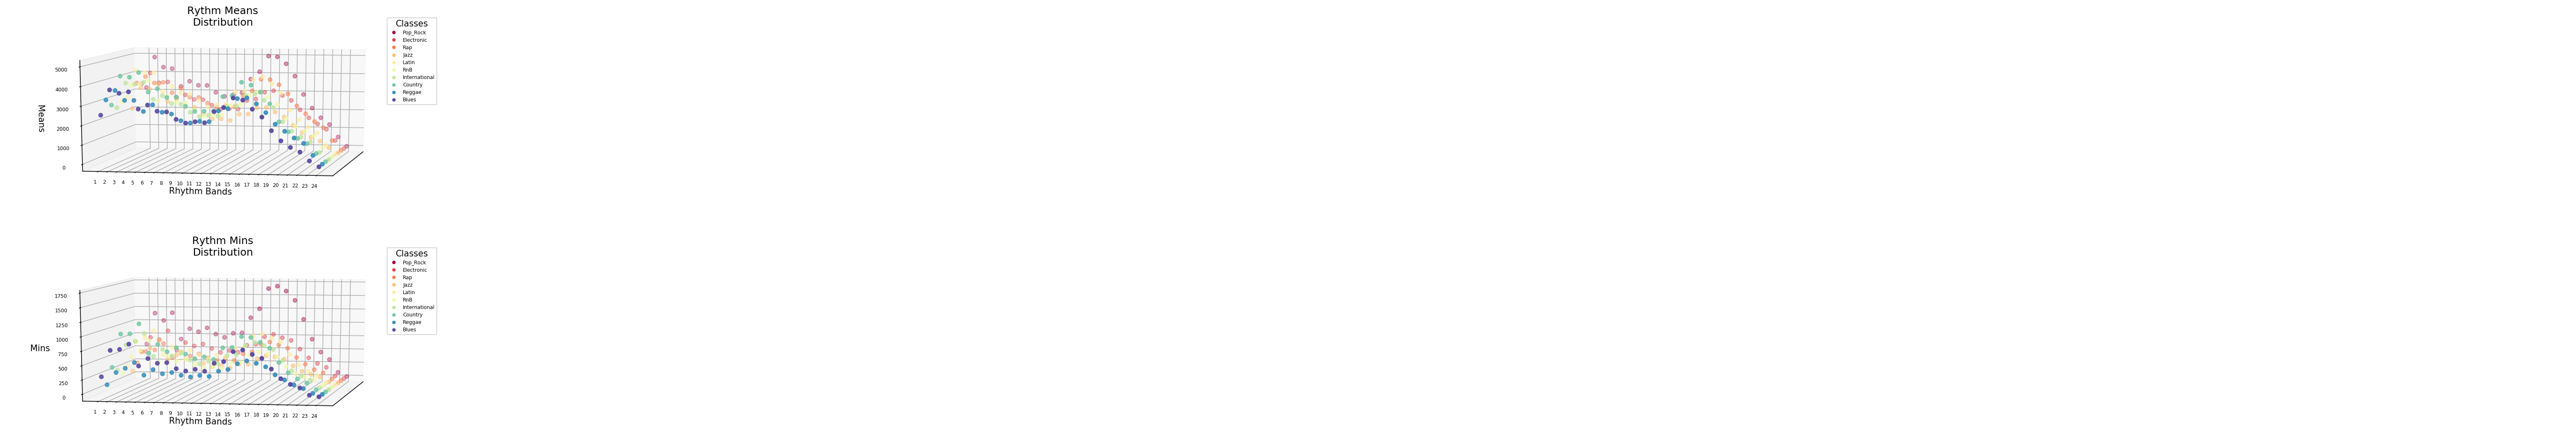

In [13]:
# Call function to analyze the rhythm bands
analyze_rhythm()


# 3. Methods and experiments
Our complete design methodology can be summarized by the block diagram that is given below 
![title](img/block.jpg)

### Loading of the CSV files into Dataframes

In [14]:
# loading training data and labels into dataframes
df_data = pd.read_csv("train_data.csv",header=None)
df_labels = pd.read_csv("train_labels.csv",header=None,names=["label"])

# Converting the dataframes to numpy arrays to utilize in the rest of the code 
X = df_data.values
y = df_labels.label.values

## Preprocessing the data
The general method in which we pre-process the data is as follows:
- **Cleaning of the features**: We remove the MFCC columns that we found to be corrupted in data analysis. This step may or may not be done depending upon the model that is being used
- **Normalization of Data**: Getting all features scaled to same range is very important to make sure that the models learn correct representations 
- **Principal Component Analysis**: PCA helps reduce the overall dimensionality of the data and also keeps the most important features in focus

In [15]:
# Import preprocessing for feature normalization
from sklearn import preprocessing
# Import Cross VAlidation Score
from sklearn.model_selection import cross_val_score
# Import Classification report and cnfusion matrix for testing 
from sklearn.metrics import classification_report, confusion_matrix  
# Weak classifier for Adaboost
from sklearn.tree import DecisionTreeClassifier
# Importing seaborn for confusion matrix heatmaps 
import seaborn as sns
# testing and validation data splitting
from sklearn.model_selection import train_test_split
# Imbalance handling though SMOTE
from imblearn.combine import SMOTEENN
# Metrics to evaluate the model
from sklearn.metrics import accuracy_score,log_loss
# Tensorflow, Keras for NN
import tensorflow as tf
from tensorflow import keras

# XGBoost for gradient boosting 
import xgboost as xgb
# Logistic regression models
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
# Adaboost models
from sklearn.ensemble import AdaBoostClassifier
# Support vector classifier model
from sklearn.svm import SVC  

## Cleaning the Data
In this step we declare a function that will remove the first 4 MFCC coefficients and all its respective statistics.<br>
This will in total remove 16 features from all the data points and return the resultant cleaned data

In [16]:
def clean_data(X):
    '''
    Function to clean the features by removing the first 4 MFCC columns and all their statistics
    '''
    
    #The first 4 columns of MFCC
    remove = np.array([0,1,2,3])
    remove = np.array([remove+i*12 for i in range(4)])
    remove = remove.flatten()
    
    remove = np.array(mfcc)[remove]
    # Remove the elements from the numpy array and return the clean data
    clean_data = np.delete(X,remove,axis=1)
    return clean_data

## Normalization of the data

The normalization or feature scaling is an important step for PCA as well as machine learning.<br>
PCA will project the features into a space with maximal variation, hence if features aren't normalized then the components that PCA return will be incorrect. Hence before calculating the compression matrix for the data we normalize it first.<br>
For machine learning models like Linear Regression and Support vector Machines (SVMs) which utilize variants of gradient descent feature scaling helps the models converge faster when compared to models that are given features as is.

We utilize the Sklearn's MinMaxScaler() to normalize the features.

In [17]:
def normalize(X):
    '''
    Function to perform feature scaling on the data using Min Max Scaling
    '''
    
    # Utilize the MinMaxscaler for normalization 
    min_max_scaler = preprocessing.MinMaxScaler()
    # Return the scaled data
    x_scaled = min_max_scaler.fit_transform(X)
    return x_scaled

## Principal Component Analysis of Features
PCA allows us to optimally compress the information contained in high-dimensional raw feature vectors into a small set of new features, which are called principal components (PC). [4] These new features are then used for classification tasks. Using the PCs as features (instead of the raw feature vectors) is beneficial in terms of computational complexity and statistical properties.

In [18]:
def compute_pca(Z, d):
    '''
    Input: the N by D data matrix Z, the number of components d
    Output: a d by D matrix W_pca, and all eigenvalues of Q
    '''
    N = Z.shape[0]
    Q = 1/N*(Z.T@Z)

    values,vectors = np.linalg.eig(Q)

    sort  = np.argsort(values)
    largest = sort[-d:][::-1]
    W_pca = vectors[:,largest]
    W_pca = W_pca.T
    eigvalues = values
    
    return W_pca.real,eigvalues

def compression(X,PCA,num_dims):
    '''
    A function that compresses the data X into num_dims dimensions using the PCA matrix
    '''
    
    compr = X @ PCA[:num_dims,:].T
    return compr


In [19]:
def plot_error(eigvalues,max_d):
    '''
    Function to visualize the reconstruction error of PCA f
    '''
    
    x=range(1,max_d+1)
    errors=[sum(eigvalues[d:]) for d in x]
    plt.plot(x,errors)
    plt.xlabel('Number of principal components $d$')
    plt.ylabel('Reconstruction error $\mathcal{E}$')
    plt.title('Number of principal components vs the reconstruction error')
    plt.show()

### Reconstruction Error of PCA
To see how many principal components we need to select to ensure that the error is minimal we plot a reconstruction error graph.<br>
From the graph we see that beyond 150 principal components the error is minimal and the reduction in features size is considerable.

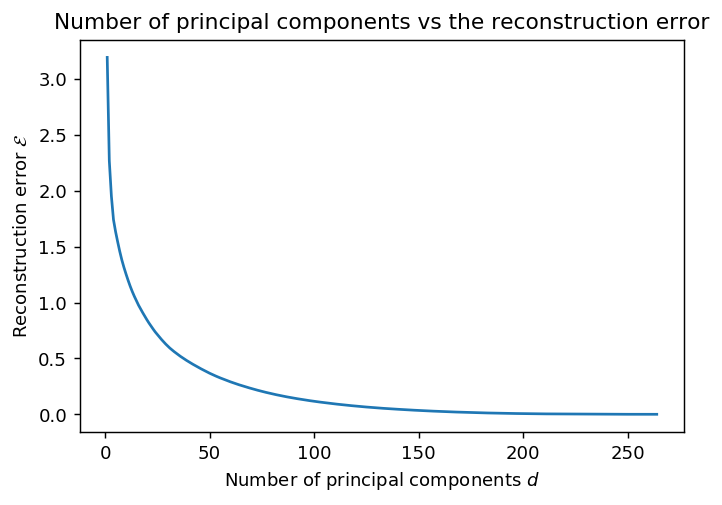

In [20]:
mpl.rcParams['figure.dpi']=130
# Compute the PCA matrix
PCA,eigvals = compute_pca(Z=normalize(X),d=264)
# Visualize the PCA reconstruction errors
plot_error(eigvals,264)

## Methods for Hyper Parameter Tuning
Many of the models that is considered in the project have various parameters that can be tunes to increase the performance and accuracy of the trained model. Some of the hyper parameters and explanation of the values that can be used for some of the models used in the project are as follows:
1. Neural Networks:
    - Optimizer  : RMSProp,Adam, AdaGrad etc
    - Layers     : Number of hidden layers
    - Neurons    : Number of neurons in each layer
    - Activation : Sigmoid, ReLu, SeLu
    - Dropout    : Fraction of inputs to be dropped, combats overfitting 
2. Linear Regression:
    - Optimizer  : Newton-cg, LBFGS, SAGA
    - C          : Inverse of L2 regularization parameter
3. XGBoost :
    - Depth      : maximum tree depth for the weak estimators
    - eta        : step shrinkage size, combats overfitting
    - Lambda     : L2 regularization parameter
    - metric     : evaluation metric for validation




## Cross Validation 

The easiest way to to tune for hyper parameters is through cross validation. Cross validation is when the dataset is split into 3 portions:
1. Training
2. Cross Validation
3. Testing


This method will train the model on the testing data and evaluate is performance on the Cross Validation data. The model whose parameter yields the best cross validation score will be one that will used to predict from the test dataset.<br>
Through this process we can can parameters that will make the model perform better on test data. The only drawback with this method is that with limited data, the splits result in very small number of samples in each set. Models such as neural networks do not work well with lesser data points hence will perform poorly.

### K Folds
A method that can work even when the size of the data is small is KFolds.<br>
Assume that we are doing 4 folds cross validation, then we divide the data into $k$ parts and during every $k^th$ iteration we leave out the $k^th$ portion of the data as testing data and use the remaining as training data. Then after performing $k$ iterations we can calculate the average of the metric that we have chosen to get the cross-validation score. <br>
This cross validation score allows us to compare models with different hyper-parameters and choose the one with the est cross-validation score. The best benefit of Kfolds is that it is not affected by classes or groups, hence will perform well with our imbalance in the data<br>
A simple diagram explaining the Kfolds cross validation for  $k=4$:
![title](img/kfolds.png)

In [21]:
def get_splits(X,labels,test_size=0.4,val_size=0.4,random_state=0,smote=False,validation=True):
    '''
    Function to get the training and tesing splits
    
    smote     : Boolean option to specify whether or not to perform SMOTE on the training data split
    validation : Boolean option to specify if a validation split is needed or not
    '''
    # Perform a Train Test split irrespective of options
    X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=test_size, random_state=random_state)
    
    # If validation is needed split the train further into train and validation
    if validation == True:
        
        X_train,X_val,y_train,y_val= train_test_split(X_train,y_train, test_size=val_size, random_state=random_state)

        if smote ==False:
            return X_train,X_val,X_test,y_train,y_val,y_test
        sm = SMOTEENN(random_state=random_state)

        X_res, y_res = sm.fit_resample(X_train, y_train)
        return X_res,X_val,X_test,y_res,y_val,y_test
    
    else:
        if smote ==False:
            return X_train,X_test,y_train,y_test
        sm = SMOTEENN(random_state=random_state)

        X_res, y_res = sm.fit_resample(X_train, y_train)
        return X_res,X_test,y_res,y_test

## Oversampling to Handle Imbalance
There are 2 broad methods to handle imbalances in a database:
1. Under-Sampling:<br>
   In this method we take fewer examples from classes that have larger representation so that we balance the number of examples from the class that is in the minority. This method does not introduce any noise in the training data but may reduce the total number of samples that can be trained on by a significant amount. Hence under-sampling is used when the even the minority class has a sufficiently large number of samples.
2. Over-Sampling: <br>
   In over-sampling we create synthetic data for the classes that are in the minority. The creation of these extra samples is through a perturbation and hence can increase significant noise in very high dimensional datasets. 
   
Given the already small dataset at our disposal, the method that we chose to explore is over-sampling and in specific Synthetic Minority Over-Sampling Technique (SMOTE) [5]

### SMOTE
This method creates synthetic samples for a data point in the minority class by taking samples of the feature space for each target class and its nearest neighbors, and generates new examples that combine features of the target case with features of its neighbors. This approach increases the features available to each class and makes the samples more general.<br>
As mentioned in the original paper [5] there are more advanced sampling that combine both oversampling of minority classes and under-sampling majority classes to achieve better results in metrics such as Area under ROC curve (AOC) and F1-score. 

The issue is the in data with many features the feature space is so large for classes that addition of even slightly perturbed samples will cause major changes in decision boundaries in the dataset. 
In this project we will utilize **imblearn** package to implement SMOTE to try and handle the imbalances in the database.

## Report of the Test Evaluation 
To evaluate the performance of any model we need to compare test results.<br>
The metrics that we monitor are the **accuracy score** and **multi-class log loss** of the model. In most cross-validation trials also we  be using the same metrics.


One thing to note is that in datasets with imbalances the accuracy is not a good measure of the quality of the classifier. So we also monitor the **precison**,**recall** and **f1-score** of the model (sometimes the **aoc(area under ROC curve)** ) after predicting on the test set. But as these metrics are not the one that will not be displayed in the report as there is already information of the performance from the **confusion matrix** and the accuracy scores.

In [22]:
def report(y_pred,y_test,y_prob):
    '''
    Function that prints a report of the test evalutaion. 
    It outputs a confusion matrix and the accuracy score and logloss of the model
    '''
    
    mpl.rcParams['figure.dpi']=80
    # Calculate the log loss 
    logloss = log_loss(y_test, y_prob)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
   
    cm = cm / cm.astype(np.float).sum(axis=1)
    
    # Calculate the score
    score = accuracy_score(y_test,y_pred)
    
    mpl.rcParams['figure.dpi']=80
    
    df = pd.DataFrame(cm,index=classes,columns=classes)
    plt.figure(figsize=(9,9))
    heatmap = sns.heatmap(df, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label')
    all_sample_title = 'Accuracy :{0:.4f} \nLogloss: {1:.4f}'.format(score,logloss)
    plt.title(all_sample_title, size = 15)
    # Print the F1 score classification report
    #classification_report(y_test,y_pred)
    plt.show()

## Approaches
In trying to effectively classify the genres we chose to see the efficacy of non-linear vs linear machine learning models.
The models that were experimented with are :
1. Neural Networks
2. Logistic Regression
3. Gradient Boosting 

### Neural Networks
A neural network is a computational model based on the structure and functions of biological neural networks. Information that flows through the network affects the structure of the NN because a neural network changes - or learns, in a sense - based on that input and output. [6] <br>
NNs are considered nonlinear statistical data modeling tools where the complex relationships between inputs and outputs are modeled or patterns are found.

### Logistic Regression
Logistic regression is a statistical method for analysing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes). It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables. You can also think of logistic regression as a special case of linear regression when the outcome variable is categorical, where we are using log of odds as dependent variable. In simple words, it predicts the probability of occurrence of an event by fitting data to a logit function.

### Gradient Boosting
Lets first define what Boosting is,it is an ensemble technique for creating collection of powerful predictors, and Gradient Boosting is a technique for producing regression models consisting of collections of regressors.

An ensemble is a collection of predictors whose predictions are combined usually by some sort of weighted average or vote in order to provide an overall prediction that takes its guidance from the collection itself. So boosting is an ensemble technique in which learners are learned sequentially with early learners fitting simple models to the data and then analyzing the data for errors, those errors identify problems or particular instances of the data that are difficult or hard to fit, as a consequence later models focus primarily on those examples trying to get them right.

At the end, all the models contribute with weights and the set is combined into some overall predictors, so boosting is a method of converting a sequence of weak learners into a very complex predictor, it’s a way of increasing the complexity of a particular model initial learners tend to be very simple and then the weighted combination can grow more and more complex as learners are added. [7]

The two main gradient boosting techniques that were explored in the project were:
1. AdaBoost
2. XGBoost



# Results
Now we will discuss the results obtained from implementing the methods that were discussed in the previous section.<br>
Each implementation will be explained in some detail and the results analyzed superficially, the proper discussion of the implication of the results will be discussed in the next section

## Neural Networks
The first method that was tested was a Neural Network. There was a cross validation done using a validation split of the dataset and tuning was done for the number of layers and the number of neurons per layer and the dropout fraction. [6]

First to analyze the neural network we utilize the **validation loss** and **validation accuracy** graphs along with training loss and accuracy.This gives us information if the NN starts to overfit the training data.

In [23]:
def plot_history(history):
    '''
    Function that plots the Validation loss and accuracy along with trianing loss and accuracy.
    '''
    
    mpl.rcParams['figure.dpi']=80
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val loss')
    plt.title('Model Training vs Validation loss')
    plt.legend()
    plt.show()
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(history.epoch, np.array(history.history['acc']),
           label='Train Accuracy')
    plt.plot(history.epoch, np.array(history.history['val_acc']),
           label = 'Val Accuracy')
    plt.title('Model Training vs Validation Accuracy')
    plt.legend()
    plt.show()
    
    

### Testing NN
The function below was designed to be used either for evaluating or testing a specific NN implementation. It can be used with the $cv$ parameter to cross validate data.
From the cross validation performed the results obtained were :
- 3 hidden layers perform better than 2 hidden layers
- a dropout ratio of 0.2 produced optimal performance without too much over-fitting 
- Adam was the best optimizer

In [24]:
def test_nn(X,y,num_epochs=100,batch_size=32,drop_out=0.2,num_neurons=128,cv=False,smote=False):
    '''
    Function that trains a NN and tests it against the test data set
    
    num_epochs  : How many epochs to train the NN for
    batch_size  : The number of samples to take for the gradient descent step
    drop_out    : The ratio of inputs to drop at each layer
    '''
    
    keras.backend.clear_session()
    X_train,X_val,X_test, y_train,y_val,y_test = get_splits(X=X,labels=y,smote=smote,validation=True)
    
    # because tensorflow expects labels from 0-9
    y_train = y_train-1
    y_val = y_val-1
    y_test = y_test-1
    N = X_train.shape[1]
    
    
    model = keras.Sequential([
        keras.layers.Dense(num_neurons, activation=tf.keras.activations.sigmoid,input_shape=(N,)),
        keras.layers.Dropout(drop_out),
        keras.layers.Dense(num_neurons,activation=tf.keras.activations.relu),
        keras.layers.Dropout(drop_out),
        keras.layers.Dense(num_neurons,activation=tf.keras.activations.relu),
        keras.layers.Dropout(drop_out),
        keras.layers.Dense(10, activation='softmax')
    ])


    
    model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.001), 
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=num_epochs,batch_size=batch_size,validation_data=(X_val,y_val),verbose=False)

    
    y_pred = model.predict_classes(X_test)
    y_prob = model.predict(X_test)
    loss_score = model.evaluate(X_test,y_test)
    if(cv==False):
        print(model.summary())
        plot_history(history)
        report(y_pred,y_test,y_prob)
        return model
    
    return history,loss_score


## 3 Layer Neural Network with Dropout 
Let us take a look at the results of the NN that was trained after cross validation tuning.<br>
The following cell has the following results:
1. Model Summary:
    - 3 hidden layers with 128 neurons in each layer followed by a 10 neuron softmax layer
    - Dropout rate of 0.2 after every hidden layer output
2. Model Training vs Validation loss:
    - The model learn well till 20 epochs and then starts over-fitting
    - The validation loss gets worse and increases with over-fitting
    - Validation loss never drops below 1.2
3. Model Training vs Validation accuracy
    - Similar but inverse trends as loss, model accuracy tends to over-fit
4. Confusion Matrix:
    - International and Blues genre seem to have very accuracy overall
    - Misclassification rate is low
   
### Best Kaggle Accuracy: 0.59296
### Best Kaggle LogLoss : 0.37549

1746/1746 [==============================] - 0s 90us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               33920     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)   

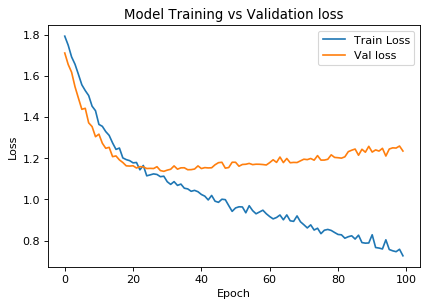

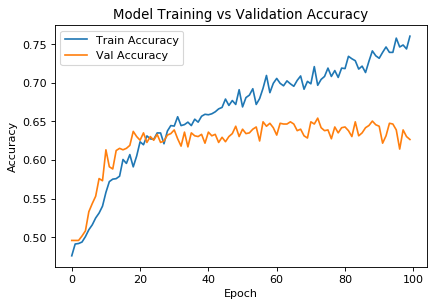

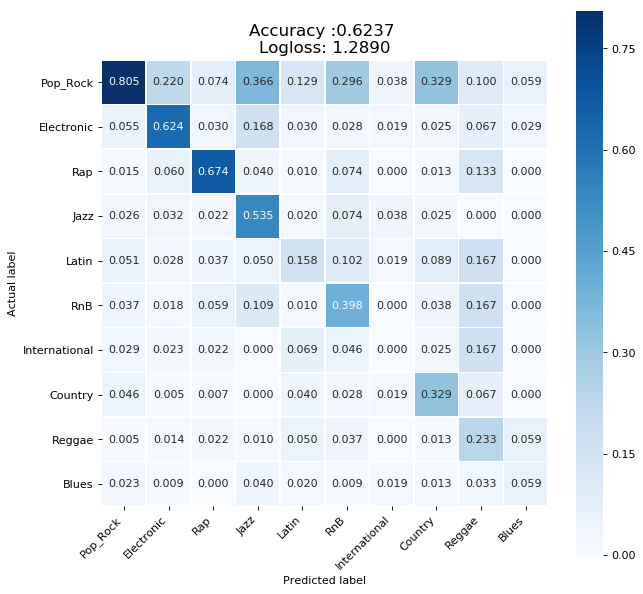

In [25]:
# Compute PCA matrix
PCA,eigvals = compute_pca(Z=normalize(X),d=264)

# Evalutate the NN 
model = test_nn(X=compression(normalize(X),PCA,264),y=y,num_neurons=128)

## Logistic Regression

To test out classifiers a generic function will be defined to take in any classifier and perform training and preparing a report on the test results

In [26]:
def test_classifier(clf,data,labels,smote=False):
    '''
    Function that can be used to evalute the performance of any linear classifier like Logistic regression or AdaBoostClassifier
    smote: An option to specify if we need to SMOTE the training data split 
    '''
    
    X_train, X_test, y_train,y_test = get_splits(data,labels,smote=smote,validation=False)
    # Fit the model
    clf.fit(X_train,y_train)
    
    # Predict on test data
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)

    # Print report
    report(y_pred=y_pred,y_test=y_test,y_prob=y_prob)
   


### Logistic Regression with Clean Normalized Data
The first logistic regression classifier was trained on just the dataset that was cleaned and normalized.
This does reduce the number of features but the dimensionality is still high.<br>
Cross validation was performed using the $LogisticRegresssionCV$ class with 10 values of the inverse regularization parameter $C$ picked from a logarithmic scale from $10e-4$ to $10e+4$ and run on **5 fold** cross validation.<br>
This means $10\cdot 5=50$ models were fit and the best model was chosen.<br>

The results obtained after testing on the test set are as follows:
- The accuracy is already better than the NN
- The logloss is also improved
- The International and Blues genres are still not having good accuracy in prediction, this may be a deeper problem 

The corresponding Kaggle scores were a little lower than the scores obtained on the training data given. This may indicate that the model has not learned a proper description of the actually underlying structure of the data. 

#### Best Kaggle Accuracy: 0.58787
#### Best Kaggle Log Loss: 0.19011

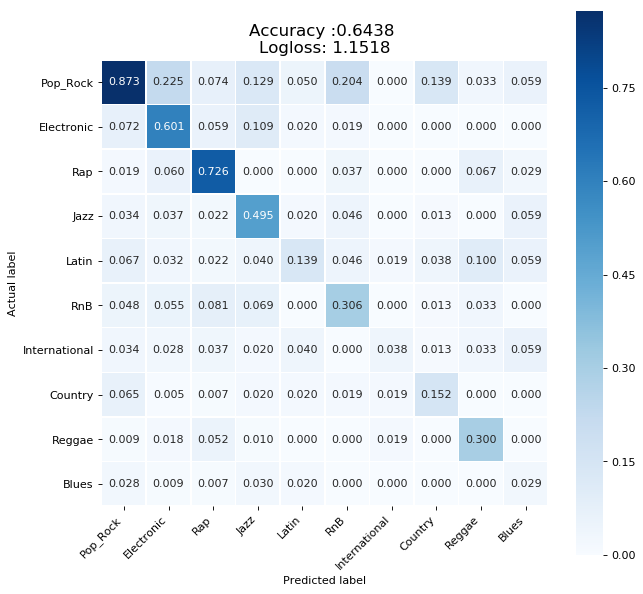

In [27]:
# Run CV on Logistic Regression with only cleaned data 
log_clf = LogisticRegressionCV(Cs=10,solver='newton-cg',multi_class='auto',max_iter=1000,cv=5)
test_classifier(log_clf,normalize(clean_data(X)),y)

### Logistic Regression with 150 PCA Features
In the second logistic regression model we passed it 150 features after compressing the dimensions using PCA. This effectively changed the space $264 \to 150$, also its not only dimensionality reduction, PCA also maps the features in a space where each component is orthogonal and has the most variance along that component.<br>
This in turns increases the offline test on the training data and also increases the accuracy on the Kaggle data also. But a thing to note is that the logloss didn't improve in Kaggle.<br>
We can see in the confusion matrix below that the model has gotten slightly better at predicting the International genre of music compared to non-PCA logistic regression
#### Best Kaggle Accuracy: 0.60315
#### Best Kaggle Log Loss: 0.19402

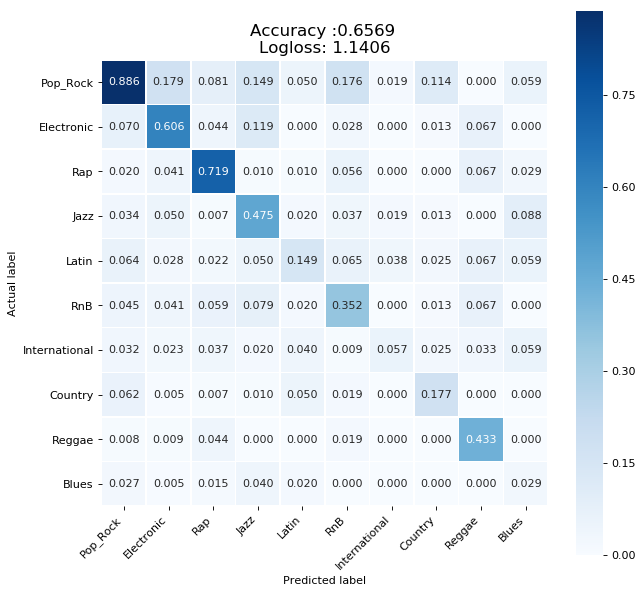

In [31]:
# Run CV on Logistic Regression with PCA compression 

log_pca_clf = LogisticRegressionCV(Cs=10,solver='newton-cg',multi_class='auto',max_iter=1000,cv=5)
PCA,eigvals = compute_pca(Z=normalize(X),d=264)

test_classifier(log_clf,compression(normalize(X),PCA=PCA,num_dims=150),y)

## Results with SMOTE
Now we handle the imbalance in the dataset by utilizing the over-sampling methods that were described in the previous section.<br>
**Note** We split the data into training testing and validation sets but only utilize SMOTE on the training. This is done so that while evaluating the performance of the model we test it against the actual data points and not synthetically created data points.<br>
We utilize SMOTE in this case with 2 of the previous models and list the results obtained  

### Logistic Regression with SMOTE
We train a Logistic regression model on training data that has been sampled using SMOTE. The results that we see are quite strange.<br>
The model when trained with SMOTE data seems to be having a worse performance on the test set than the regular logistic regression models that were trained earlier.
The results are as follows 
- very bad accuracy, below $50%$
- Many misclassification errors in the confusion matrix
- The International genre now seems to be classified more but wrongly, and Pop rock is now classified more as International
- The SMOTE seems to have caused some change to the model's understanding of the data

Further implications will be discussed in the following sections 

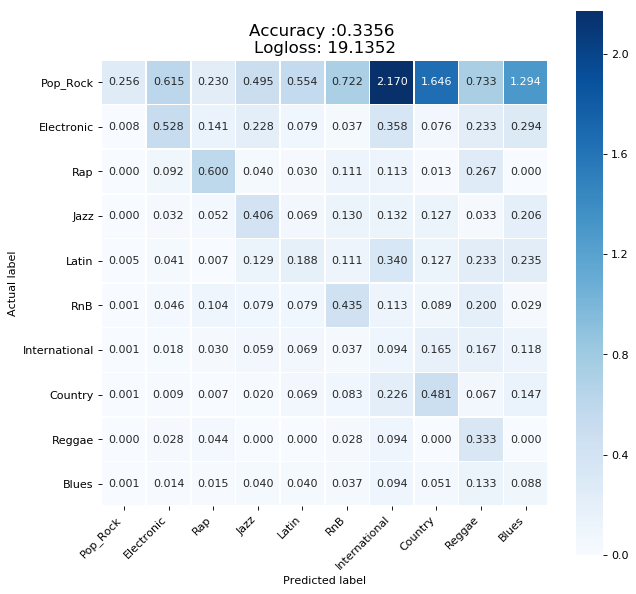

In [32]:
PCA,eigvals = compute_pca(Z=normalize(X),d=264)

# Running Logistic regresion with SMOTE applied to the training data
log_smote_clf = LogisticRegressionCV(Cs=10,solver='newton-cg',multi_class='auto',max_iter=1000,cv=5)

test_classifier(clf=log_smote_clf,data=compression(normalize(X),PCA=PCA,num_dims=150),labels=y,smote=True)

### Neural Networks with SMOTE
We trained a similar but larger 3 hidden layer NN with 264 neuron in each layer. The results obtained are :
1. Model Summary:
    - Larger model with more parameters
    - This decision was made as there are at least 5 to 6 times more data in the training sets now
    - A larger NN can for more complex models
2. Validation Loss and Accuracy Graphs:
    - There is a clear indication that the NN is overfitting even after 10 epochs of training
    - The validation loss and accuracy plateau and are much worse than the previous NN
3. Confusion Matrix:
    - We see simalar misclassification errors for Pop rock as  International, RnB and Reggae genres
    - International genre still lacks proper predictions 

1746/1746 [==============================] - 0s 21us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 264)               69960     
_________________________________________________________________
dropout (Dropout)            (None, 264)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 264)               69960     
_________________________________________________________________
dropout_1 (Dropout)          (None, 264)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 264)               69960     
_________________________________________________________________
dropout_2 (Dropout)          (None, 264)               0         
_________________________________________________________________
dense_3 (Dense)   

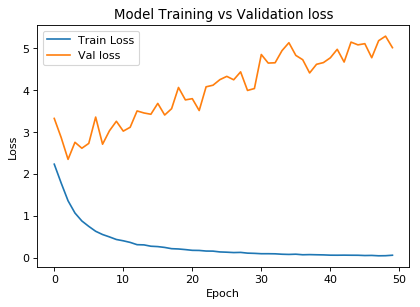

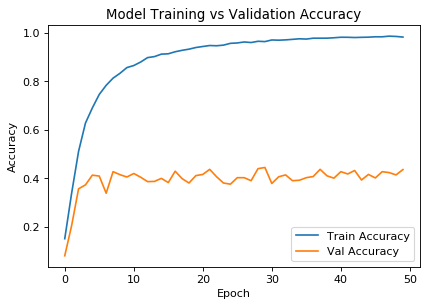

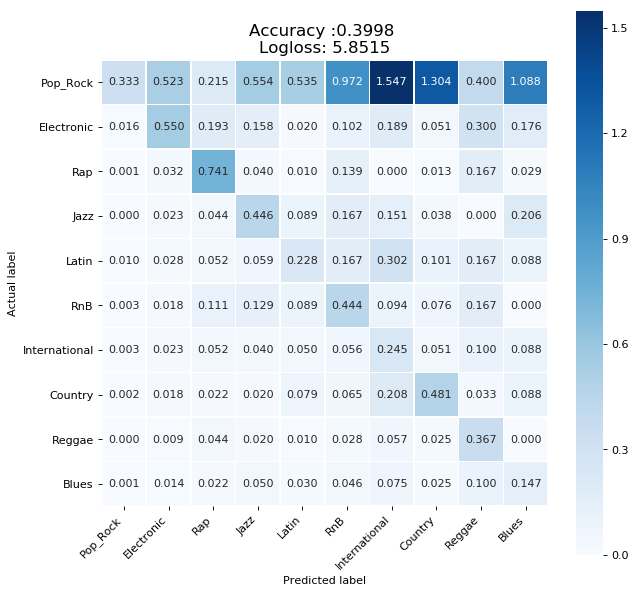

In [33]:
PCA,eigvals = compute_pca(Z=normalize(X),d=264)

# Running a NN with training data that has been over-sampled using SMOTE
smote_model =test_nn(X=compression(normalize(X),PCA,264),y=y,num_neurons=264,smote=True,num_epochs=50)

## Gradient Boosting 
Gradient boosting is a very effective classifier that is able to handle imbalances in the dataset. They are in general an ensemble of weak predictors like decision trees that n turn are able to represent much more complex models than they were able to individually.<br>
A thing to note is that the gradient boosting methods have quite a few hyper parameters to tune and can provide results that are particularly better than models with parameters that haven't been tuned fully.<br>
Here we employ a cross-validation set to tune the hyper parameters

### AdaBoost 
It is called _Adaptive Boosting_ that uses simple decision tree classifiers to tune the estimators to classify more of the data correctly that had been misclassified by the previous estimator. Hence in a way it adapts to the misclassification of the classes in every successive boosting .<br>
The final model is represented as a weighted sum of all the individual classifiers as the output of the boosted classifier.<br>
The results of the AdaBoost are as follows:
- The model does achieve 50% accuracy 
- The misclassification rate is low
- But the model doesn't seem to predict the other minority classes

The results can be explained, **AdaBoost is very sensitive to outliers**, so as we are not sure if any of the genres have outliers and the dataset is quite limited data points for many classes it may be really to hard to train an ensemble that performs any better with AdaBoost that is able to predict more than the first 3 majority classes

The Kaggle accuracy also drops a bit from the offline test accuracy which hints as underlying structure is not captured by the estimators correctly.

#### Best Kaggle Accuracy :0.52929


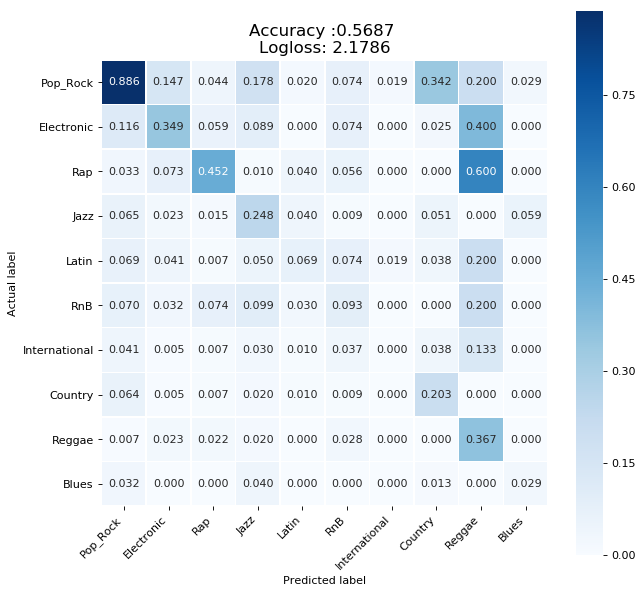

In [34]:
# Declare the AadBoost classifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=600,learning_rate=0.1)
test_classifier(ada_clf,normalize(clean_data(X)),y)

### XGBoost
XGBoost is a gradient boosting technique developed by Chen and Guestrin that emphasizes on performance and efficiency. [7]<br>
It works on the same principle as using many weak estimators and boosting their results to obtain a final complex and string classifier that is able to handle the imbalances and minority of the classes.<br>
The results obtained are as follows:
- The accuracy is immediately greater than 64% on local and Kaggle at the same time
- The confusion matrix we can see has better values across its diagonal 
- Even minority classes like Blues and Reggae are also having good true positives
- International genre still has low classification rate
- Latin genre has lower classification rate lower than the logistic regression
#### Best Kaggle Accuracy: 0.65104
#### Best Kaggle Logloss  : 0.21816

In [57]:
def xgboost(param,data,labels,quite=False,num_rounds=1000):
    X_train,X_val,X_test, y_train,y_val,y_test = get_splits(X=X,labels=y,validation=True,smote=False)
    # subtract one to make 0 to 9

    dtrain = xgb.DMatrix(X_train,label=y_train-1)
    dval = xgb.DMatrix(X_val,label=y_val-1)
    dtest = xgb.DMatrix(X_test,label=y_test-1)

    evallist=[(dval,'validation'),(dtest,'test')]
    num_round = num_rounds
    results ={}
    bst = xgb.train(param, dtrain, num_round,evallist,evals_result=results,early_stopping_rounds=242,verbose_eval=False)
    
    if quite == False:
        print("Best n_tree limit: ",bst.best_ntree_limit)
        print("Best iteration: ",bst.best_iteration)
        y_prob = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)
        print("Test Evalutaion\n",bst.eval(dtest,name='testing',iteration=bst.best_iteration))
        y_pred = np.argmax(y_prob,axis=1)
        report(y_pred+1,y_test,y_prob)
    
    return results,bst
    

Best n_tree limit:  242
Best iteration:  241
Test Evalutaion
 [241]	testing-mlogloss:1.276037	testing-merror:0.349943


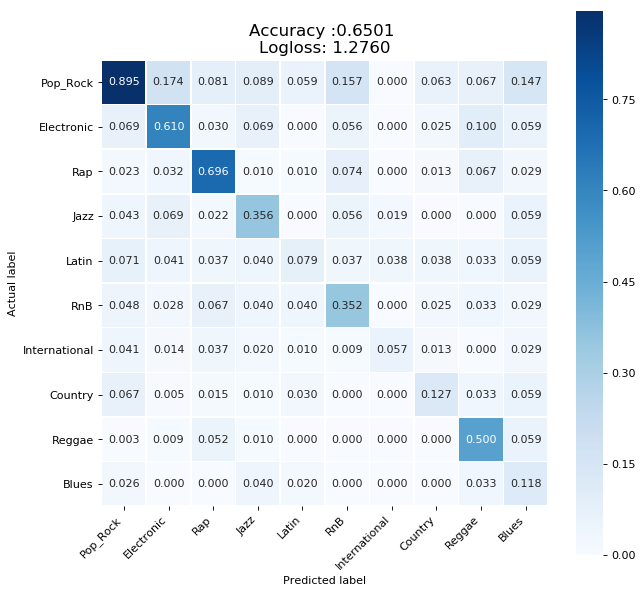

In [58]:
param = {}
# use softmax multi-class classification
param['objective'] = 'multi:softprob'
# scale weight of positive examples
param['eta'] = 0.1

param['max_depth'] = 10
param['silent'] = 1
param['num_class'] = 10
param['eval_metric']=['mlogloss','merror']
param['reg_lambda']=0.005994842503189409
param['reg_alpha']=0
param['min_child_weight']=4
eval_data,clf=xgboost(param=param,data=normalize(X),labels=y,num_rounds=242)

### Feature Importance Results of XGBoost 
- Below are the importances that XGboost gives to various features of the dataset.

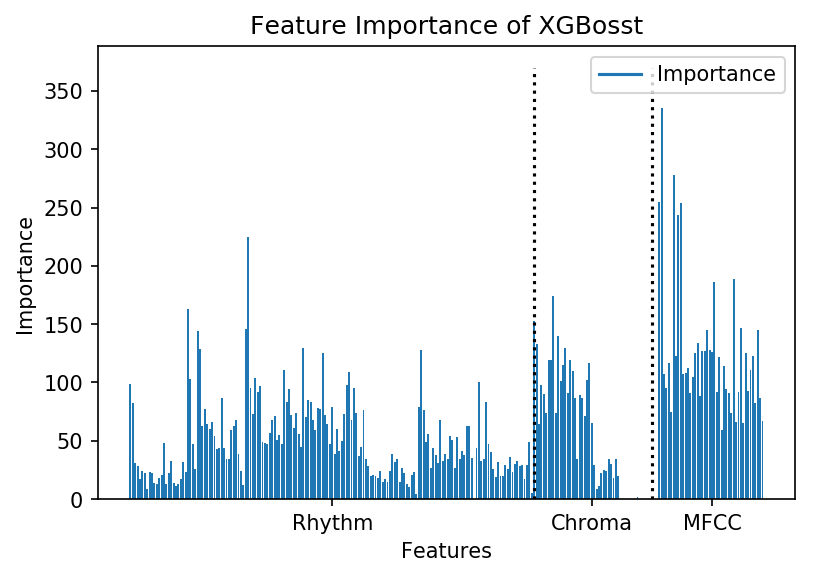

In [64]:
mpl.rcParams['figure.dpi']=150
f_scores = clf.get_fscore()
vals = sorted([(int(a[1:]),b) for a,b in f_scores.items()])
x,y = zip(*vals)
plt.bar(x,y)
plt.legend([mpl.lines.Line2D([],[])],['Importance'])
plt.xlabel('Features')
plt.title('Feature Importance of XGBosst')
plt.xticks([84,192,242],['Rhythm','Chroma','MFCC'])
plt.vlines(168,0,370,linestyles='dotted')
plt.vlines(217,0,370,linestyles='dotted')
plt.ylabel('Importance')
plt.show()

# Discussion:

## Interpretation of Results
The results offered a lot of insight into the nature of the data ad the relative powers of different approaches. The following subsections will discuss different aspects of the results that were obtained

### NN vs Logistic Regression
As we saw from the data, the logistic regression models outperformed the NN models in accuracy and log loss scores. Possible discussions are :
- There is insufficient data present for the NN to create a generalization of the data distribution
- The NN tends to overfit to exactly predict the training set of data
- This is why NN with 128 neurons per layer perform better than more neurons, they are simpler models and do not overfit 
- The logistic regression is able to find efficient classifiers for more genres of music hence is able to score better both on the online and offline data points
- But both these models fail to capture or predict the International and Blues genres successfully

### Low Accuracy for International and Blues
The **Blues genre** has low prediction accuracy across the board in all the models that we have trained so far. There is a simple explanation for it: **ONLY 86 Data Points**. There simply isn't enough data for it to firstly be learned properly by any classifier and secondly it's frequency is so low, not predicting it will not affect the accuracy.<br>

Similarly the **International genre** has also had only prediction in the single digits and ***even in the best XGBoost model had fewer true positives than the Blues genre that has lesser data points***. This points to something much more basic in the dataset.


But the most import question for discussion is then why didn't SMOTE help with these minority classes?

### Feature Importances of XGBoost
- The MFCC features have the most importance. This follows the observations that were made in the Data Analysis sections.
- Certain rhythm features are also having high importance implying that rhythm of songs are useful to classify genres
- Even without cleaning the features, the model learn to avoid the first 4 MFCC coefficients means

### Why SMOTE made it worse
A very interesting result that came from utilizing the over-sampling technique SMOTE is that models performed worse with oversampling than without. In summary we saw:
- Huge misclassification errors for many genre
- Pop rock misclassified as International genre in both SMOTE models

The last is an interesting observation as it hints at a **correlation between the International genre and the Pop Rock genre**. This is why the synthetic samples for International genre are created they ended up shifting the decision boundary for Pop rock to International. This may be because the original regions of Pop Rock and International are quite close by in the feature space, hence when synthetic samples were created in the neighborhood of International now end up being very similar to songs of Pop Rock genre.<br>
This hypothesis is further supported by the fact in the XGBoost model the class that International is most misclassified as is Pop Rock. This maybe the reason why all the models have a hard time learning decision boundaries between the majority class Pop Rock and the minority class International. [3]


## *Suggestions for future research/improvement.*
1. A popular solution to any ML algorithm optimization is more data!
But for the current project, more balanced data might be the correct solution. If for the current project we could train on a more balanced dataset, the Kaggle accuracy and also the train accuracy would increase drastically.
2. Coming up with Better Performance Metrics:
Accuracy and Multi-log Loss are widely accepted metrics for the Performance of an Algorithm, But in many cases they do not talk about the bigger picture, We need to utilize new metrics which correctly captures the performance of ML algorithms for specifically the case presented to us

## *Did the study answer your questions?*
This particular Study prompted us to understand how different ML techniques perform with the Song dataset.
We went with a prior bias that Neural Networks would excel, but were proven other-wise, and instead we came up with a novel solution of "XGBoosting". We already know how lucrative the perfect music genre classification can be and now hope we can build upon our approach and  build that Perfect Classification Algorithm. 




# References
[1] McKay, C. 2004: Issues in Automatic Musical Genre Classification. https://pdfs.semanticscholar.org/3935/8e2b39c9bb8d6b401e8ef583d46b5440c21b.pdf

[2]McKay, C. & Fujinaga, I. 2006: Musical Genre Classification: Is It Worth Pursuing and How Can It be Improved? https://pdfs.semanticscholar.org/298b/ee3d5bc640f335820e23bc91bb53919d798e.pdf

[3]Schedl, M., Zamani, H., Chen, CW. et al. 2018: Current challenges and visions in music recommender systems research https://doi.org/10.1007/s13735-018-0154-2

[4]Jung, A. 2018: Machine Learning: Basic Principles https://arxiv.org/abs/1805.05052

[5]Chawla, N., Bowyer, K., Hall, L. and Kegelmeyer, W. (2002). SMOTE: Synthetic Minority Over-sampling Technique. Journal of Artificial Intelligence Research, 16, pp.321-357.

[6] Rumelhart, David E., Geoffrey E. Hinton, and R. J. Williams. "Learning Internal Representations by Error Propagation". David E. Rumelhart, James L. McClelland, and the PDP research group. (editors), Parallel distributed processing: Explorations in the microstructure of cognition, Volume 1: Foundation. MIT Press, 1986.

[7]  Chen, T. and Guestrin, C. (2016). XGBoost. Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining - KDD '16.


# Appendix

## Creating Kaggle results for the Accuracy and Logloss

In [59]:
df_kaggle = pd.read_csv('test_data.csv',header=None)
PCA,eigvals = compute_pca(Z=normalize(X),d=264)
kaggle = df_kaggle.values
kaggle_norm = compression(normalize((kaggle)),PCA=PCA,num_dims=264)
kaggle_pred = model.predict_classes(kaggle_norm)+1

## Analysis of Results with the best results so far 

In [60]:
best = pd.read_csv('accuracy_solution_29_Oct_3.csv')['Sample_label'].values
best_nn = pd.read_csv('accuracy_solution_26_Oct_1.csv')['Sample_label'].values
for i in range(1,11):
    print("Sum of class {0} for best: {1} and output is {2}".format(i,sum(best==i),sum(kaggle_pred==i)))
print(sum(best==kaggle_pred))

Sum of class 1 for best: 4221 and output is 334
Sum of class 2 for best: 901 and output is 795
Sum of class 3 for best: 469 and output is 123
Sum of class 4 for best: 281 and output is 3805
Sum of class 5 for best: 115 and output is 384
Sum of class 6 for best: 281 and output is 491
Sum of class 7 for best: 23 and output is 257
Sum of class 8 for best: 102 and output is 87
Sum of class 9 for best: 97 and output is 116
Sum of class 10 for best: 54 and output is 152
1143


## Writing to file

In [61]:
output = pd.DataFrame()
output['Sample_id'] = range(1,len(kaggle_pred)+1)
output['Sample_label'] = [int(i) for i in kaggle_pred]
file_name = "NN_final.csv"
output.to_csv(file_name,index=False)

## Calculating Log Probabilities for Kaggle Dataset

In [62]:
kaggle_log_pred = model.predict_proba(kaggle_norm)
result_log = pd.DataFrame(data=kaggle_log_pred,columns=['Class_{0}'.format(i) for i in range(1,11)])
result_log['Sample_id'] = result_log.index+1
cols = result_log.columns.tolist()
cols = [cols[-1]]+cols[:-1]
result_log = result_log[cols]
result_log.head()


,Sample_id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9,Class_10
0,1,2.172161e-09,9.127305e-07,1.737305e-10,0.000288,5.737802e-07,1.880736e-04,9.995222e-01,1.355628e-12,1.125401e-09,5.353684e-11
1,2,8.846982e-11,2.088381e-05,3.975228e-09,0.999979,3.705843e-09,1.952640e-10,1.502938e-07,2.573720e-15,9.422987e-08,8.211965e-08
2,3,5.898543e-05,3.528436e-03,1.718252e-08,0.000244,8.526710e-02,9.102882e-01,2.490112e-04,3.610482e-04,5.628622e-07,2.975923e-06
3,4,9.684137e-01,2.709490e-02,3.937871e-03,0.000046,1.579511e-04,2.093783e-04,1.210499e-04,4.225240e-06,8.756416e-09,1.440649e-05
4,5,5.894142e-02,1.250345e-01,1.642094e-05,0.089854,9.297239e-04,7.237719e-01,1.127706e-03,3.018285e-04,2.567607e-06,1.991290e-05


In [63]:
file_name = "NN_final_logloss.csv"
result_log.to_csv(file_name,index=False)